In [1]:
import json
import numpy as np
from copy import deepcopy
from datetime import datetime
from functools import partial

import matplotlib.pyplot as plt

from simplebo import SimpleBO
from utils import plot_progress

## 0. Useful commands

```python
# get settings before optimization
bo.initial_settings

# set back to before optimization
_set_new_parameters(bo.initial_settings, param_names=bo.input_params)


# set back to best found settings
bo.set_back_to_best()
```


## 1. SASE1 Tuning with Air Coils

In [2]:
# load config file
with open("conf/SASE1_CAX_CAY.json", "r") as f:
    p_config_1 = json.load(f)


## 1.1  4 Input Params, different settings

### 1.1 (a) Different Acquisition Functions

Use 4 air coils, test with different Acquisition Functions

Save log to 
```python
f"log/4d_{datetime.now().strftime('%Y_%m_%d-%H_%M_%S')}.json"
```

__Test with different air coils, e.g. 4 evenly distributed along the undulator__

In [3]:
np.array(p_config_1["id"])[[0,1,2,3]]

array(['XFEL.FEL/UNDULATOR.SASE1/CAX.CELL3.SA1/FIELD.OFFSET',
       'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL3.SA1/FIELD.OFFSET',
       'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL4.SA1/FIELD.OFFSET',
       'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL4.SA1/FIELD.OFFSET'],
      dtype='<U52')

In [8]:
config_1_4d = deepcopy(p_config_1)
indices = [0,4,8,12,16,20]
# indices = []
config_1_4d["id"] = np.array(p_config_1["id"])[indices]
config_1_4d["bounds"] = np.array(p_config_1["lims"])[indices]

In [9]:
# UCB Acquisition
log_file = f"log/6d_ucb_{datetime.now().strftime('%Y_%m_%d-%H_%M_%S')}.json"

bo = SimpleBO(
    config_1_4d, acquisition="UCB", proximal_len=0.01, step_limit_type="hard"
)
bo.max_iter = 50


KeyboardInterrupt: 

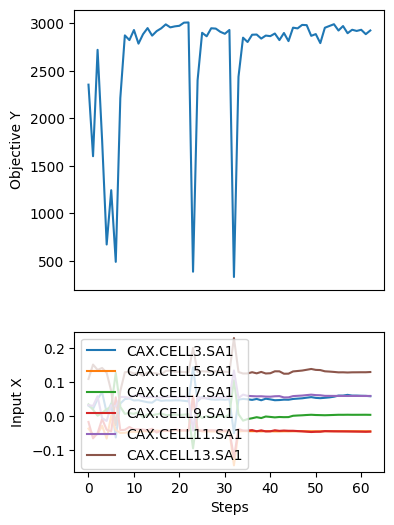

In [10]:
fig, axes = plt.subplots(2,1, figsize=(4,6), height_ratios=(2,1))
bo.optimize(set_to_best=True, fname=log_file, callback=partial(plot_progress, bo, fig, axes))

In [11]:
# bo.save(log_file)

In [12]:
# EI Acquisition
log_file = f"log/6d_ei_{datetime.now().strftime('%Y_%m_%d-%H_%M_%S')}.json"

bo_ei = SimpleBO(
    config_1_4d, acquisition="EI", proximal_len=0.01, step_limit_type="hard"
)
bo_ei.max_iter = 50

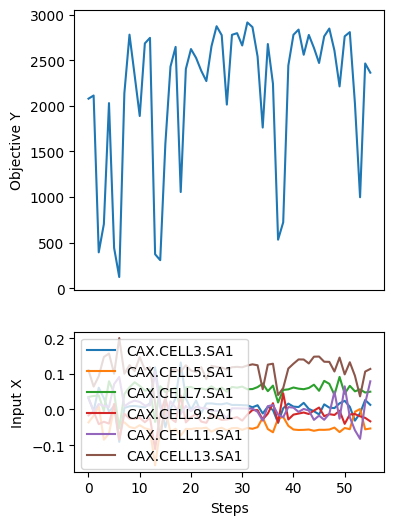

In [13]:
fig, axes = plt.subplots(2,1, figsize=(4,6), height_ratios=(2,1))
bo_ei.optimize(fname=log_file, callback=partial(plot_progress, bo_ei, fig, axes))

### 1.1 (b) BO with differnt Step Sizes

Test BO with proximal length `[0.01,0.05,0.1,0.2]`

In [58]:
import importlib
import simplebo
importlib.reload(simplebo)

<module 'simplebo' from '/System/Volumes/Data/home/xfeloper/user/kit_bo/bo-4-euxfel/simplebo.py'>

In [35]:
config_1_step = deepcopy(p_config_1)
# indices = [0,4,8,12,16,20]
indices = [0,1]
config_1_step["id"] = np.array(p_config_1["id"])[indices]
config_1_step["bounds"] = np.array(p_config_1["lims"])[indices]

In [37]:
log_file = f"log/2d_stepsize_{datetime.now().strftime('%Y_%m_%d-%H_%M_%S')}.json"

bo = SimpleBO(
    config_1_step, acquisition="UCB",
    proximal_len=0.5
)
bo.max_iter = 50

{'input': ['XFEL.FEL/UNDULATOR.SASE1/CAX.CELL3.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL3.SA1/FIELD.OFFSET'], 'objective': 'XFEL.FEL/XGM/XGM.2643.T9/INTENSITY.SA1.RAW.TRAIN', 'nreadings': 30, 'interval': 0.1, 'max_iter': 50, 'bounds': [[-0.5, -0.5], [0.5, 0.5]], 'acquisition': 'UCB', 'step_limit_type': 'proximal', 'proximal_len': [0.5, 0.5], 'step_size': 0.10000000149011612, 'fixed_noise': False}


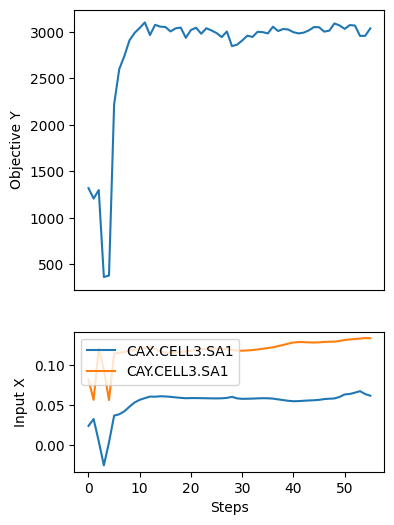

In [38]:
fig, axes = plt.subplots(2,1, figsize=(4,6), height_ratios=(2,1))
bo.optimize(set_to_best=True, fname=log_file, callback=partial(plot_progress, bo, fig, axes))
print(bo.history["metadata"])

### 1.1 (c) BO with auto fitting noise or use explicit noise

In [ ]:
# log_file = f"log/4d_fixnoise_{datetime.now().strftime('%Y_%m_%d-%H_%M_%S')}.json"

# bo = SimpleBO(
#     config_1_4d, acquisition="UCB",
#     proximal_len=0.5,
#     fixed_noise=True,
# )

In [ ]:
# fig, axes = plt.subplots(2,1, figsize=(4,6), height_ratios=(2,1))
# bo.optimize(set_to_best=True, fname=log_file, callback=partial(plot_progress, bo, fig, axes))

### 1.1.(d) Try to figure out the best condition for BO

In [ ]:
# log_file = f"log/bo_log_{datetime.now().strftime('%Y_%m_%d-%H_%M_%S')}.json"

# bo = SimpleBO(
#     config_1_4d, acquisition="UCB",
#     proximal_len=0.01,
#     fixed_noise=True,
# )

## 1.2 Increase Number of Input Parameters benchmark with simplex

let's try [4, 6, 8, 10]?

In [66]:
config_1_highdim = deepcopy(p_config_1)
# indices = [0,4,8,12,16,20]
# indices = [0,1,9,10,22,23]
# indices = [0,1,9,10,22,23,36,37]
indices = [0,1,9,10,16,17,22,23,36,37]
config_1_highdim["id"] = np.array(p_config_1["id"])[indices]
config_1_highdim["bounds"] = np.array(p_config_1["lims"])[indices]

In [77]:
log_file = f"log/benchmark_ucb_{datetime.now().strftime('%Y_%m_%d-%H_%M_%S')}.json"

bo = SimpleBO(
    config_1_highdim, acquisition="UCB",
    proximal_len=0.5,
)
# bo.max_iter = 50
bo.max_iter = 100

{'input': ['XFEL.FEL/UNDULATOR.SASE1/CAX.CELL3.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL3.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL7.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL8.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL11.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL11.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL14.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL14.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL21.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL21.SA1/FIELD.OFFSET'], 'objective': 'XFEL.FEL/XGM/XGM.2643.T9/INTENSITY.SA1.RAW.TRAIN', 'nreadings': 30, 'interval': 0.1, 'max_iter': 100, 'bounds': [[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], 'acquisition': 'UCB', 'step_limit_type': 'proximal', 'proximal_len': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'step_size': 0.10000000149011612, 'fixed_noise': False}


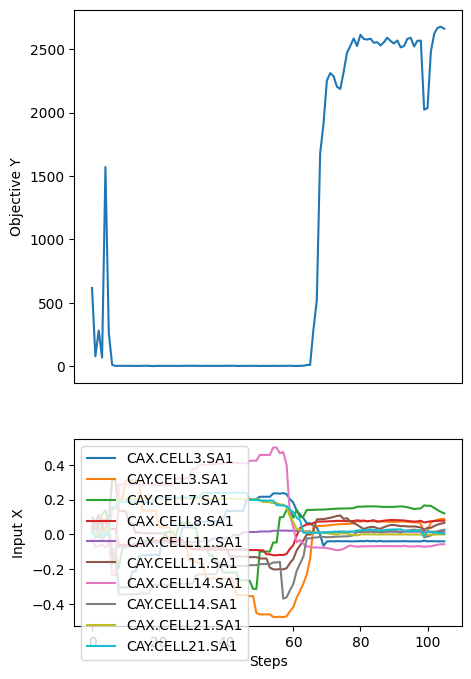

In [78]:
fig, axes = plt.subplots(2,1, figsize=(5,8), height_ratios=(2,1))
bo.optimize(set_to_best=True, fname=log_file, callback=partial(plot_progress, bo, fig, axes))
print(bo.history["metadata"])

In [106]:
config_1_highdim = deepcopy(p_config_1)
# indices = [0,4,8,12,16,20]
# indices = [0,1,9,10,22,23]
# indices = [0,1,9,10,22,23,36,37]
indices = [0,1,9,10,16,17,22,23,36,37,42,43]
config_1_highdim["id"] = np.array(p_config_1["id"])[indices]
config_1_highdim["bounds"] = np.array(p_config_1["lims"])[indices]

log_file = f"log/benchmark_ucb_{datetime.now().strftime('%Y_%m_%d-%H_%M_%S')}.json"

bo = SimpleBO(
    config_1_highdim, acquisition="UCB",
    proximal_len=0.5,
)
# bo.max_iter = 50
bo.max_iter = 100

In [108]:
bo.max_iter = 200

{'input': ['XFEL.FEL/UNDULATOR.SASE1/CAX.CELL3.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL3.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL7.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL8.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL11.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL11.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL14.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL14.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL21.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL21.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL24.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL24.SA1/FIELD.OFFSET'], 'objective': 'XFEL.FEL/XGM/XGM.2643.T9/INTENSITY.SA1.RAW.TRAIN', 'nreadings': 30, 'interval': 0.1, 'max_iter': 200, 'bounds': [[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], 'acquisition': 'UCB', 'step_limit_type': 'proximal', 'pr

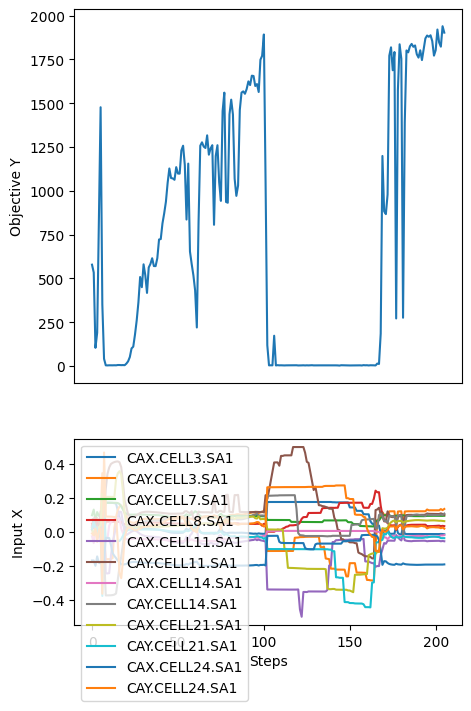

In [109]:
fig, axes = plt.subplots(2,1, figsize=(5,8), height_ratios=(2,1))
bo.optimize(set_to_best=True, fname=log_file, callback=partial(plot_progress, bo, fig, axes))
print(bo.history["metadata"])

## To see how two consequtive 6-d runs perform

In [110]:
config_1_highdim = deepcopy(p_config_1)

indices = [0,1,9,10,16,17]
# indices = [0,1,9,10,22,23,36,37]
# indices = [0,1,9,10,16,17,22,23,36,37,42,43]
config_1_highdim["id"] = np.array(p_config_1["id"])[indices]
config_1_highdim["bounds"] = np.array(p_config_1["lims"])[indices]

log_file = f"log/two6d_ucb_{datetime.now().strftime('%Y_%m_%d-%H_%M_%S')}.json"

bo = SimpleBO(
    config_1_highdim, acquisition="UCB",
    proximal_len=0.5,
)
bo.max_iter = 50
# bo.max_iter = 100

{'input': ['XFEL.FEL/UNDULATOR.SASE1/CAX.CELL3.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL3.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL7.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL8.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL11.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL11.SA1/FIELD.OFFSET'], 'objective': 'XFEL.FEL/XGM/XGM.2643.T9/INTENSITY.SA1.RAW.TRAIN', 'nreadings': 30, 'interval': 0.1, 'max_iter': 50, 'bounds': [[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], 'acquisition': 'UCB', 'step_limit_type': 'proximal', 'proximal_len': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'step_size': 0.10000000149011612, 'fixed_noise': False}


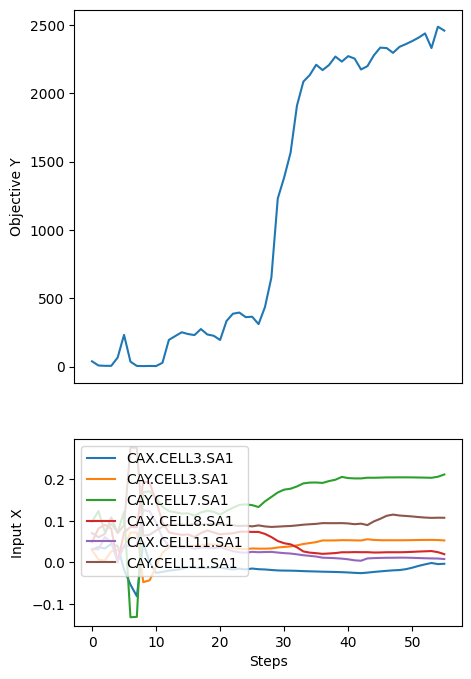

In [111]:
fig, axes = plt.subplots(2,1, figsize=(5,8), height_ratios=(2,1))
bo.optimize(set_to_best=True, fname=log_file, callback=partial(plot_progress, bo, fig, axes))
print(bo.history["metadata"])

In [112]:
# 2nd part of the 6-d run 

indices = [22,23,36,37,42,43]
# indices = [0,1,9,10,16,17,22,23,36,37,42,43]
config_1_highdim["id"] = np.array(p_config_1["id"])[indices]
config_1_highdim["bounds"] = np.array(p_config_1["lims"])[indices]

log_file = f"log/two6d_ucb_{datetime.now().strftime('%Y_%m_%d-%H_%M_%S')}.json"

bo = SimpleBO(
    config_1_highdim, acquisition="UCB",
    proximal_len=0.5,
)
bo.max_iter = 50

{'input': ['XFEL.FEL/UNDULATOR.SASE1/CAX.CELL14.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL14.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL21.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL21.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL24.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL24.SA1/FIELD.OFFSET'], 'objective': 'XFEL.FEL/XGM/XGM.2643.T9/INTENSITY.SA1.RAW.TRAIN', 'nreadings': 30, 'interval': 0.1, 'max_iter': 50, 'bounds': [[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], 'acquisition': 'UCB', 'step_limit_type': 'proximal', 'proximal_len': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'step_size': 0.10000000149011612, 'fixed_noise': False}


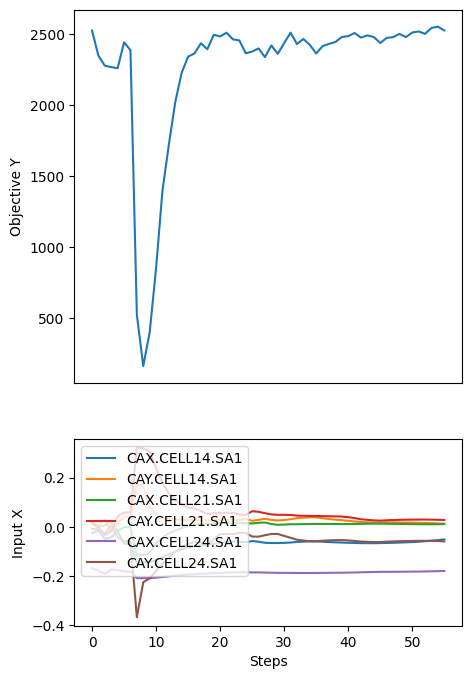

In [113]:
fig, axes = plt.subplots(2,1, figsize=(5,8), height_ratios=(2,1))
bo.optimize(set_to_best=True, fname=log_file, callback=partial(plot_progress, bo, fig, axes))
print(bo.history["metadata"])

## Lower number of averaging

to see when it breaks with noisy observation

In [7]:
config_1_highdim = deepcopy(p_config_1)

indices = [0,1,9,10,16,17]
# indices = [0,1,9,10,22,23,36,37]
# indices = [0,1,9,10,16,17,22,23,36,37,42,43]
config_1_highdim["id"] = np.array(p_config_1["id"])[indices]
config_1_highdim["bounds"] = np.array(p_config_1["lims"])[indices]

log_file = f"log/two6d_ucb_{datetime.now().strftime('%Y_%m_%d-%H_%M_%S')}.json"

bo = SimpleBO(
    config_1_highdim, acquisition="UCB",
    proximal_len=0.5,
#     fixed_noise=True,
)
bo.max_iter = 50
bo.nreadings = 5
# bo.max_iter = 100

{'input': ['XFEL.FEL/UNDULATOR.SASE1/CAX.CELL3.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL3.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL7.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL8.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL11.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL11.SA1/FIELD.OFFSET'], 'objective': 'XFEL.FEL/XGM/XGM.2643.T9/INTENSITY.SA1.RAW.TRAIN', 'nreadings': 5, 'interval': 0.1, 'max_iter': 50, 'bounds': [[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], 'acquisition': 'UCB', 'step_limit_type': 'proximal', 'proximal_len': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'step_size': 0.10000000149011612, 'fixed_noise': False}


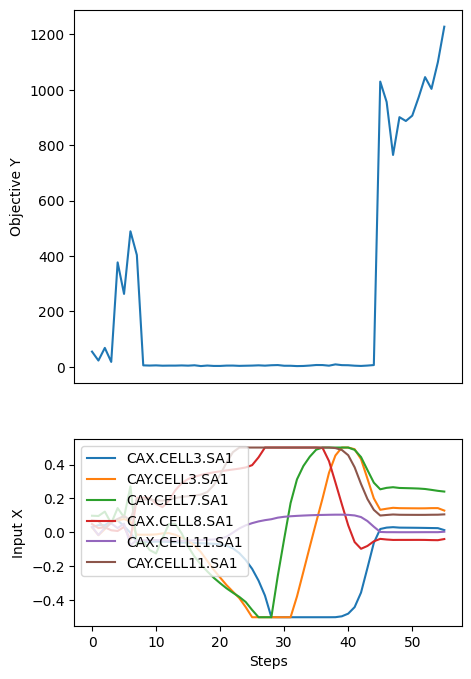

In [8]:
fig, axes = plt.subplots(2,1, figsize=(5,8), height_ratios=(2,1))
bo.optimize(set_to_best=True, fname=log_file, callback=partial(plot_progress, bo, fig, axes))
print(bo.history["metadata"])

In [15]:
config_1_highdim = deepcopy(p_config_1)
indices = [0,1,9,10,16,17,22,23,36,37,42,43]
config_1_highdim["id"] = np.array(p_config_1["id"])[indices]
config_1_highdim["bounds"] = np.array(p_config_1["lims"])[indices]

bo = SimpleBO(
    config_1_highdim, acquisition="UCB",
    proximal_len=0.5,
    step_limit_type="hard",
)

log_file = f"log/12d_ucb_{datetime.now().strftime('%Y_%m_%d-%H_%M_%S')}.json"

# bo.max_iter = 50
bo.max_iter = 200
bo.nreadings = 5

{'input': ['XFEL.FEL/UNDULATOR.SASE1/CAX.CELL3.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL3.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL7.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL8.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL11.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL11.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL14.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL14.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL21.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL21.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL24.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL24.SA1/FIELD.OFFSET'], 'objective': 'XFEL.FEL/XGM/XGM.2643.T9/INTENSITY.SA1.RAW.TRAIN', 'nreadings': 5, 'interval': 0.1, 'max_iter': 200, 'bounds': [[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], 'acquisition': 'UCB', 'step_limit_type': 'hard', 'proxima

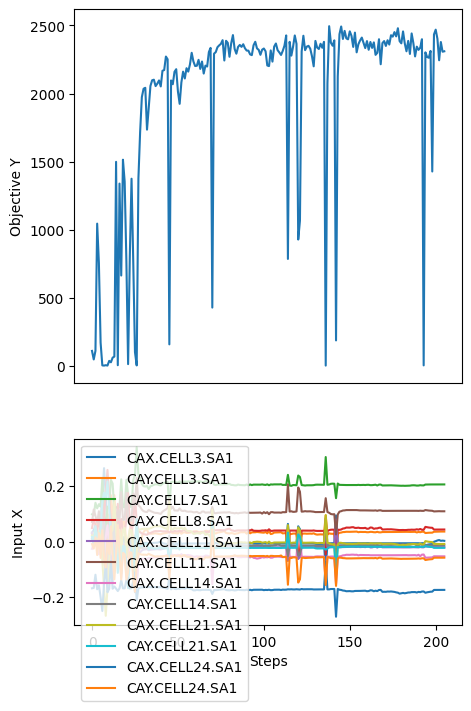

In [16]:
fig, axes = plt.subplots(2,1, figsize=(5,8), height_ratios=(2,1))
bo.optimize(set_to_best=True, fname=log_file, callback=partial(plot_progress, bo, fig, axes))
print(bo.history["metadata"])

## high dim

In [ ]:
import torch

In [104]:
config_1_highdim = deepcopy(p_config_1)
indices = [0,1,9,10,16,17,22,23,36,37,42,43]
config_1_highdim["id"] = np.array(p_config_1["id"])[indices]
config_1_highdim["bounds"] = np.array(p_config_1["lims"])[indices]

# load old 10 dim runs
# old_datafile = "log/benchmark_ucb_2022_11_24-12_07_37.json"
# load history 12 dim runs
old_datafile = "log/loadold_ucb_2022_11_24-12_57_11.json"
with open(old_datafile, "r") as f:
    old_data = json.load(f)
    
log_file = f"log/loadold_ucb_{datetime.now().strftime('%Y_%m_%d-%H_%M_%S')}.json"

bo = SimpleBO(
    config_1_highdim, acquisition="UCB",
    proximal_len=0.5,
)
# bo.max_iter = 50
bo.max_iter = 100
use_data = list(np.arange(20,120))
# use_data = [0:-1]
bo.Y = torch.tensor(np.array(old_data["Y"])[use_data], dtype=torch.double).reshape([-1,1])
bo.Y_std = torch.tensor(np.array(old_data["Y_std"])[use_data], dtype=torch.double).reshape([-1,1])
n_initial = bo.Y.shape[0]
bo.X = torch.tensor(np.array(old_data["X"])[use_data], dtype=torch.double)
# bo.X = torch.zeros([n_initial, 12],dtype=torch.double)
# bo.X[:,:10] = torch.tensor(np.array(old_data["X"])[use_data], dtype=torch.double)
# bo.X[:,10] = -0.1685
# bo.X[:,11] = -0.009


bo.history["initial"] = {
    "X": bo.X.detach().tolist(),
    "Y": bo.Y.detach().tolist(),
    "Y_std": bo.Y_std.detach().tolist(),
} # add initial settings

bo.initialized=True

KeyboardInterrupt: 

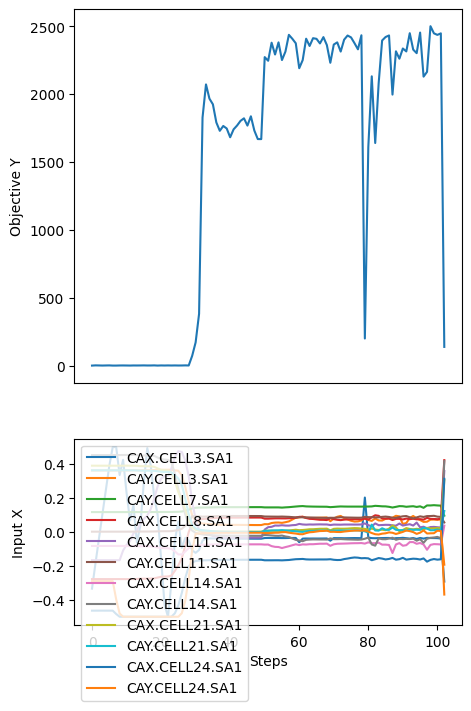

In [105]:
fig, axes = plt.subplots(2,1, figsize=(5,8), height_ratios=(2,1))
bo.optimize(set_to_best=True, fname=log_file, callback=partial(plot_progress, bo, fig, axes))
print(bo.history["metadata"])

## Try loading previous data

In [65]:
import torch

In [80]:
# old_datafile = "log/benchmark_ucb_2022_11_24-10_13_49.json"
old_datafile = "log/benchmark_ucb_2022_11_24-12_07_37.json"
with open(old_datafile, "r") as f:
    old_data = json.load(f)

In [84]:
log_file = f"log/loadold_ei_{datetime.now().strftime('%Y_%m_%d-%H_%M_%S')}.json"

bo = SimpleBO(
    config_1_highdim, acquisition="EI",
    proximal_len=0.5,
)
# bo.max_iter = 50
bo.max_iter = 100
bo.X = torch.tensor(old_data["X"], dtype=torch.double)
bo.Y = torch.tensor(old_data["Y"], dtype=torch.double).reshape([-1,1])
bo.Y_std = torch.tensor(old_data["Y_std"], dtype=torch.double).reshape([-1,1])
bo.history["initial"] = {
    "X": bo.X.detach().tolist(),
    "Y": bo.Y.detach().tolist(),
    "Y_std": bo.Y_std.detach().tolist(),
} # add initial settings

bo.initialized=True

{'input': ['XFEL.FEL/UNDULATOR.SASE1/CAX.CELL3.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL3.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL7.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL8.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL11.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL11.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL14.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL14.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL21.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL21.SA1/FIELD.OFFSET'], 'objective': 'XFEL.FEL/XGM/XGM.2643.T9/INTENSITY.SA1.RAW.TRAIN', 'nreadings': 30, 'interval': 0.1, 'max_iter': 100, 'bounds': [[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], 'acquisition': 'EI', 'step_limit_type': 'proximal', 'proximal_len': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'step_size': 0.10000000149011612, 'fixed_noise': False}


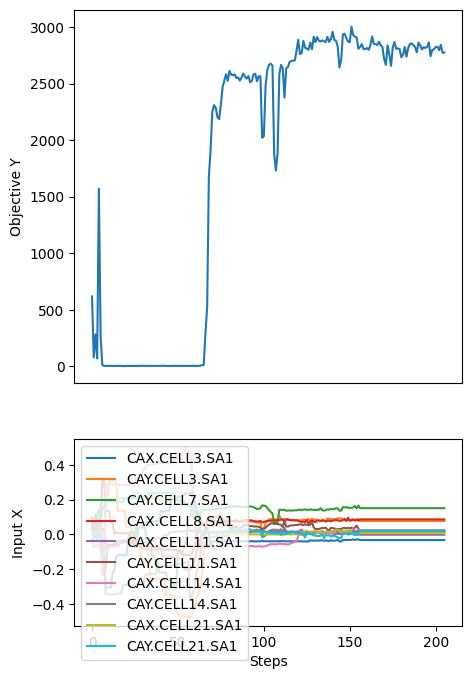

In [85]:
fig, axes = plt.subplots(2,1, figsize=(5,8), height_ratios=(2,1))
bo.optimize(set_to_best=True, fname=log_file, callback=partial(plot_progress, bo, fig, axes))
print(bo.history["metadata"])

## Task 2: SASE1 tuning with quadrupole

In [ ]:
with open("conf/SASE1_matching_quads.json", "r") as f:
    p_config_2 = json.load(f)

In [ ]:
# log_file = f"log/quad_ucb_{datetime.now().strftime('%Y_%m_%d-%H_%M_%S')}.json"

# bo = SimpleBO(
#     config_1_4d, acquisition="UCB", proximal_len=0.1
# )